# Basic Tests: Error of the median filter with different window lengths and wave number 5

##2015.10.09 DW

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [10]:
% matplotlib inline

I plot the error of the filtered wave. I use the absulte values of the difference between sine wave and median filtered wave and calculate the mean, to get the error. I use a wave number of 5 and different window lengths

##Functions

In [19]:
def ErrorPlot( waveNumber,windowLength ):
        data = np.fromfunction( lambda x: np.sin((x-windowLength / 2)/128 * 2 * np.pi * waveNumber), (128 + windowLength / 2, ) )    #creating an array with a sine wave
        datafiltered = medianFilter(data, windowLength)  #calculate the filtered wave with the medianFiltered function
        data = data[ windowLength / 2 : - windowLength ] # slice the data array to synchronize both waves
        datafiltered = datafiltered[ : len(data) ]       # cut the filtered wave to the same length as the data wave
        error = ErrorRate(data,datafiltered,windowLength,waveNumber) #calculate the error with the ErrorRate function
        plt.axis([0, y + 1, 0, 1.2])
        plt.xlabel('Wave number', fontsize = 20)
        plt.ylabel('Error rate', fontsize = 20)
        plt.scatter(*error)

In [20]:
def ErrorRate(data,datafiltered,windowLength, waveNumber):
    errorrate = data-datafiltered  #calculate the difference between the sine wave and the filtered wave
    error = [] #creating a list and save the error rate with the matching wavenumber in it 
    errorrate = np.abs(errorrate)
    error.append([windowLength ,np.mean(errorrate)])# fill the list with the errorrate and corresponding window length
    error = zip(*error) #zip the error ([1,1],[2,2],[3,3]) = ([1,2,3],[1,2,3])
    return error

In [21]:
def medianFilter( data, windowLength ): 
    if (windowLength < len(data)and data.ndim == 1):
        tempret = np.zeros(len(data)-windowLength+1)  # creating an array where the filtered values will be saved in
        if windowLength % 2 ==0:                      # check if the window length is odd or even because with even window length we get an unsynchrone filtered wave 
            for c in range(0, len(tempret)):
                tempret[c] = np.median( data[ c : c + windowLength +1 ] ) # write the values of the median filtered wave in tempret, calculate the median of all values in the window
            return tempret
        else:
            for c in range(0, len(tempret)):
                tempret[c] = np.median( data[ c : c + windowLength ] )
            return tempret
    else:
         raise ValueError("windowLength must be smaller than len(data) and data must be a 1D array")

##Plotting Figures

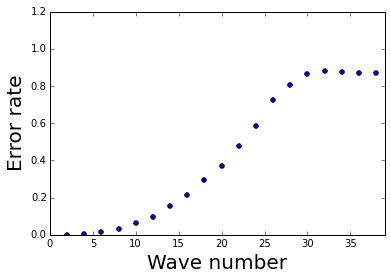

In [22]:
fig = plt.figure()
for y in range (0,40,2):
        ErrorPlot(5,y)

In [8]:
pp = PdfPages( 'Error of the median filtered sine waves with different window lengths.pdf')
pp.savefig(fig)
pp.close()